In [86]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import functools
import statistics
import math
import os
from datetime import datetime, timedelta
import random
import scipy as sp
import warnings
import gzip
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")
pd.options.mode.chained_assignment = None
import statsmodels
from statsmodels.regression.rolling import RollingOLS
import requests
import matplotlib as mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'


***
# Motivation

American legislators, such members of Congress, have access to priviledged information regarding governmental affairs, the economic landscape, and the regulatory future of the US and they are able to directly impact and influence policy and firms. Despite this, it is incredibly common for legislators to conduct strategic open-market activities that allow them to benefit directly from policy decisions that they have influence over or inside information on. As a result, public perception of these trades, made public knowledge due to the STOCK Act of 2012, which forces members of government to disclose open-market activity, suggests that these trades contain material information on either the value of the firm or some future event. 

Contrary to popular belief, findings by Abdurankhmonov et al. (2022) suggest that positive abnormal returns resulting from trading disclosure materialize the *day of* disclosure and in the time period immediately after disclosure negative abnormal returns are more likely. While surprising, this is in line with literature, with Bellmont et al. (2022) and Hall et al. (2021) also discovering that, on average, Congress members performed only slightly better than the market, and that members of Congress had higher and more robust excess returns in the pre-STOCK Act period, before 2012. For the purposes of this project, the implication is that a viable trading strategy may in fact be found in betting against, rather than with, the trades of Congresspeople and legislators.

In this project, we will create a systematic trading strategy that incorporates various signals stemming from publicly available data sources in order to invest in a selection of different assets in order to generate excess returns that are largely uncorrelated with the market and other common market factors in the Fama-French 5 factor model.

## Strategy



## Leverage



## Risk management




## Evidence for excess returns





In [87]:

data_senate = pd.read_csv('C:/Users/dcste/OneDrive/Economics_Research/Economics_Research/trade_transactions.csv')

In [88]:
data_senate['disclosure_date'] = pd.to_datetime(data_senate['disclosure_date'])
data_senate = data_senate.set_index(data_senate['disclosure_date'])
data_senate = data_senate.sort_index()
data_senate = data_senate.dropna(subset=['ticker'])
data_senate

,transaction_date,disclosure_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,party,state,industry,sector,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
disclosure_date,,,,,,,,,,,,,,,,,,,,
2014-01-31,1/24/2014,2014-01-31,Spouse,GE,General Electric Company (NYSE),NaN,Sale (Partial),"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Consumer Electronics/Appliances,Energy,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/24/2014,2014-01-31,Spouse,CRM,"Salesforce.com, Inc (NYSE)",NaN,Purchase,"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Computer Software: Prepackaged Software,Technology,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/24/2014,2014-01-31,Spouse,FB,"Facebook, Inc. (NASDAQ)",NaN,Purchase,"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,"Computer Software: Programming, Data Processing",Technology,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/28/2014,2014-01-31,Spouse,EBAY,eBay Inc. (NASDAQ),NaN,Sale (Partial),"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Business Services,Miscellaneous,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/29/2014,2014-01-31,Spouse,C,"Citigroup, Inc. (NYSE)",NaN,Sale (Partial),"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Major Banks,Finance,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-14,1/5/2023,2023-02-14,Joint,X,United States Steel Corporation Common Stock,Stock,Sale (Partial),"$1,001 - $15,000",--,Tommy Tuberville,https://efdsearch.senate.gov/search/view/ptr/9...,Republican,AL,Steel/Iron Ore,Industrials,NaN,NaN,NaN,NaN,NaN
2023-02-14,1/5/2023,2023-02-14,Joint,X,United States Steel Corporation Common Stock,Stock,Sale (Partial),"$15,001 - $50,000",--,Tommy Tuberville,https://efdsearch.senate.gov/search/view/ptr/9...,Republican,AL,Steel/Iron Ore,Industrials,NaN,NaN,NaN,NaN,NaN
2023-02-14,1/5/2023,2023-02-14,Joint,X,United States Steel Corporation Common Stock,Stock,Sale (Partial),"$50,001 - $100,000",--,Tommy Tuberville,https://efdsearch.senate.gov/search/view/ptr/9...,Republican,AL,Steel/Iron Ore,Industrials,NaN,NaN,NaN,NaN,NaN


In [89]:
data_house = pd.read_csv('C:/Users/dcste/OneDrive/Economics_Research/Economics_Research/all_transactions_house (2).csv')
data_house['disclosure_date'] = pd.to_datetime(data_house['disclosure_date'])
data_house = data_house.set_index(data_house['disclosure_date'])
data_house = data_house.sort_index()
data_house = data_house.dropna(subset=['ticker'])
data_house = data_house[data_house['ticker'] != "--"]
data_house = data_house[['disclosure_date', 'transaction_date', 'ticker', 'asset_description', 'type', 'amount', 'representative', 'party','state', 'industry' , 'sector' ]]

In [90]:
data_senate = data_senate[['disclosure_date', 'transaction_date', 'ticker', 'asset_description', 'type', 'amount', 'senator', 'party','state', 'industry' , 'sector' ]]

In [91]:
data = pd.concat([data_house, data_senate]).sort_index()
data['representative'] = data['representative'].fillna(data['senator'])
del data['senator']

In [92]:
data.index[-1]

Timestamp('2023-02-20 00:00:00')

In [93]:
prices = pd.read_csv('C:/Users/dcste/OneDrive/Economics_Research/Economics_Research/project_price_df.csv')

In [94]:
most_frequent_tickers = pd.DataFrame(data['ticker'].value_counts()).iloc[:20,:]

In [95]:
most_frequent_sector = pd.DataFrame(data['sector'].value_counts())

<AxesSubplot:title={'center':'Most Frequent Sector Traded'}>

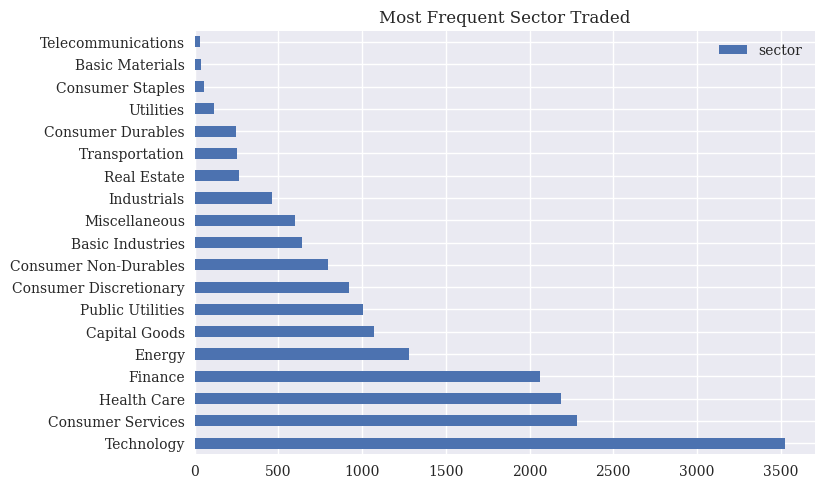

In [96]:
most_frequent_sector.plot.barh(stacked = True, title = 'Most Frequent Sector Traded')

In [97]:
most_frequent_politician = pd.DataFrame(data['representative'].value_counts()).iloc[:25,:]


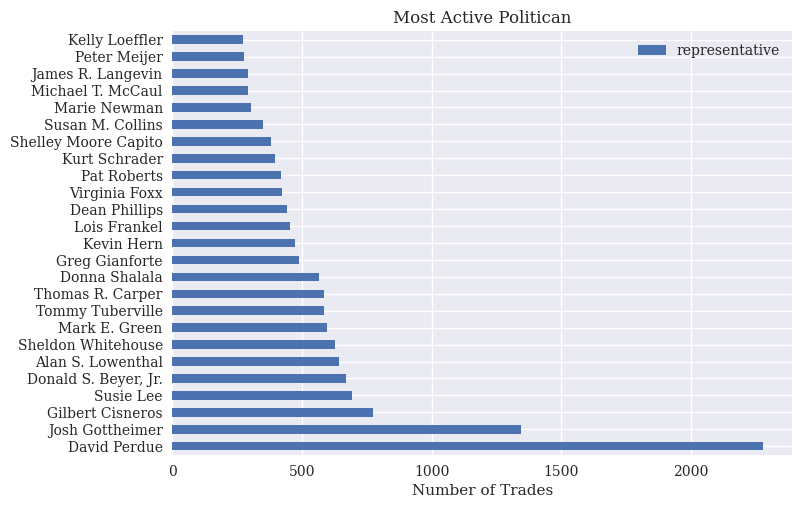

In [98]:
most_frequent_politician.plot.barh(stacked = 'True',title = 'Most Active Politican')
plt.xlabel('Number of Trades')
plt.legend()



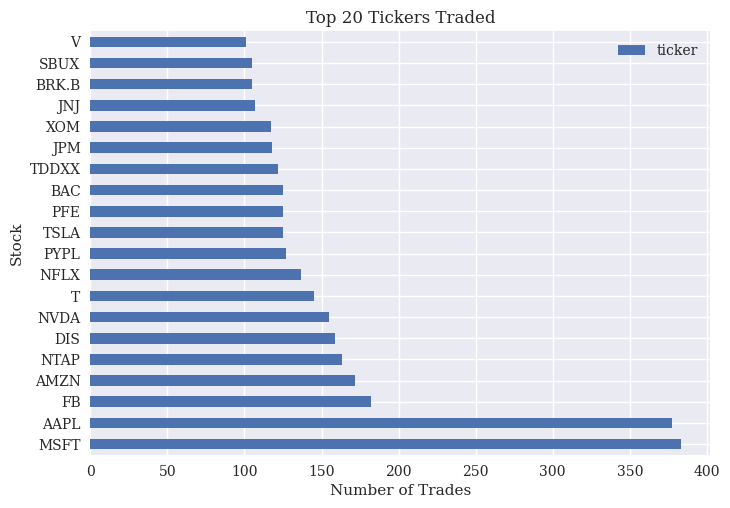

In [99]:
most_frequent_tickers.plot.barh(stacked = True, title = 'Top 20 Tickers Traded')
plt.xlabel('Number of Trades')
plt.ylabel('Stock')
plt.savefig('top_20_tickers_trade.png')


# Downloading Quandl Data

In [100]:
import quandl

apikey = 'J_fXGeVW_zC6RaDeJSQv'
quandl.ApiConfig.api_key = apikey

In [101]:
import fredapi

In [102]:
# FRED API
api_fred = 'caf2a437b55be8f56406870c1bed3521'
fred = fredapi.Fred(api_key= api_fred)

In [103]:
period_begin = '2004-01-01'
end_date = data.index[-1]


In [104]:
end_date

Timestamp('2023-02-20 00:00:00')

In [105]:
market = quandl.get_table('QUOTEMEDIA/PRICES', ticker = 'SPY',qopts = {'columns' : ['adj_close','date']}, date = {'gte':period_begin,'lte':end_date}).set_index('date').sort_index()
MARKET_RETURNS = market.resample('M').first().pct_change()
MARKET_RETURNS.columns = ['MKT_RETS']

interest_rates = quandl.get('YC/USA', start_date = period_begin,end_date = end_date)[['1-Month','3-Month','10-Year']]*(1/100)
interest_rates['term_spread'] = interest_rates['10-Year']-interest_rates['3-Month']
interest_rates = interest_rates.resample('M').first()
spy_earnings_yield = quandl.get('MULTPL/SP500_EARNINGS_YIELD_MONTH', start_date = period_begin, end_date = end_date).rename(columns={'Value':'MKT_EPS'})
consumer_sentiment = quandl.get('UMICH/SOC1',start_date = period_begin, end_date= end_date).rename(columns={'Value':'Industrial_Production'}).pct_change().fillna(0)



In [106]:
# Downloading AAA and BAA corporate bond yield from FRED WEBSIDE
AAA = pd.DataFrame(fred.get_series('DAAA'), columns = ['AAA_Yield'])*(1/100)
BAA = pd.DataFrame(fred.get_series('DBAA'), columns=['BAA_Yield'])*(1/100)
corporate_bond_yields = BAA.join(AAA, how = 'inner')
corporate_bond_yields = corporate_bond_yields.fillna(corporate_bond_yields.mean())

In [107]:
corporate_bond_yields['dsspread'] = corporate_bond_yields.BAA_Yield - corporate_bond_yields.AAA_Yield

In [108]:
mprices = market.resample('M').last()
spy_mend_eps = spy_earnings_yield.resample('M').first()
spy_mend_eps = spy_mend_eps.rolling(12).sum()

In [109]:
EPRATIO = pd.DataFrame(spy_mend_eps.values/mprices.values, columns=['EPRATIO'], index = mprices.index)

In [110]:
EPRATIO = pd.DataFrame(np.log(spy_mend_eps).values - np.log(mprices).values, columns=['EPRATIO'], index = mprices.index)

<AxesSubplot:xlabel='date'>

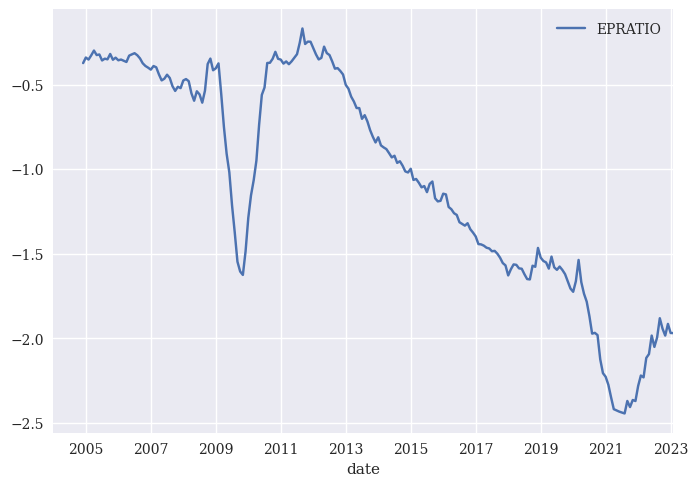

In [111]:
EPRATIO.plot()

In [112]:
interest_rates

,1-Month,3-Month,10-Year,term_spread
Date,,,,
2004-01-31,0.0088,0.0093,0.0438,0.0345
2004-02-29,0.0087,0.0094,0.0418,0.0324
2004-03-31,0.0097,0.0097,0.0400,0.0303
2004-04-30,0.0095,0.0093,0.0391,0.0298
2004-05-31,0.0083,0.0100,0.0453,0.0353
...,...,...,...,...
2022-10-31,0.0287,0.0346,0.0367,0.0021
2022-11-30,0.0372,0.0423,0.0407,-0.0016
2022-12-31,0.0404,0.0433,0.0353,-0.0080


In [113]:
spy_earnings_yield.resample('M').first()

,MKT_EPS
Date,
2004-01-31,4.40
2004-02-29,4.45
2004-03-31,4.63
2004-04-30,4.71
2004-05-31,4.97
...,...
2022-10-31,5.02
2022-11-30,4.78
2022-12-31,4.78


In [114]:
market.resample('M').last()

,adj_close
date,
2004-01-31,78.531486
2004-02-29,79.597207
2004-03-31,78.546884
2004-04-30,77.060675
2004-05-31,78.380209
...,...
2022-10-31,384.423639
2022-11-30,405.794333
2022-12-31,382.430000


In [115]:
spy_earnings_yield.resample('M').first()

,MKT_EPS
Date,
2004-01-31,4.40
2004-02-29,4.45
2004-03-31,4.63
2004-04-30,4.71
2004-05-31,4.97
...,...
2022-10-31,5.02
2022-11-30,4.78
2022-12-31,4.78


In [116]:
data_copy = data.copy()

In [117]:
def filter_trade_type(trade_type:str):
    if trade_type == 'Purchase':
        trade_type = 'Buy'
    elif trade_type == 'purchase':
        trade_type = 'Buy'
    elif trade_type == 'sale':
        trade_type = 'Sell'
    elif trade_type == 'Sale (Partial)':
        trade_type = 'Sell'
    elif trade_type == 'sale_partial':
        trade_type = 'Sell'
    elif trade_type == 'Sale (Full)':
        trade_type = 'Sell'
    elif trade_type == 'sale_full':
        trade_type = 'Sell'
    return trade_type

In [118]:
data_copy['type']  = data_copy['type'].apply(filter_trade_type)

In [119]:
data_copy = data_copy[(data_copy.type == "Buy")|(data_copy.type == "Sell")]

In [120]:
data_copy.head(5)

,disclosure_date,transaction_date,ticker,asset_description,type,amount,representative,party,state,industry,sector
disclosure_date,,,,,,,,,,,
2014-01-31,2014-01-31,1/24/2014,GE,General Electric Company (NYSE),Sell,"$1,001 - $15,000",Susan M. Collins,Republican,ME,Consumer Electronics/Appliances,Energy
2014-01-31,2014-01-31,1/24/2014,CRM,"Salesforce.com, Inc (NYSE)",Buy,"$1,001 - $15,000",Susan M. Collins,Republican,ME,Computer Software: Prepackaged Software,Technology
2014-01-31,2014-01-31,1/24/2014,FB,"Facebook, Inc. (NASDAQ)",Buy,"$1,001 - $15,000",Susan M. Collins,Republican,ME,"Computer Software: Programming, Data Processing",Technology
2014-01-31,2014-01-31,1/28/2014,EBAY,eBay Inc. (NASDAQ),Sell,"$1,001 - $15,000",Susan M. Collins,Republican,ME,Business Services,Miscellaneous
2014-01-31,2014-01-31,1/29/2014,C,"Citigroup, Inc. (NYSE)",Sell,"$1,001 - $15,000",Susan M. Collins,Republican,ME,Major Banks,Finance


- Constructing PTI **Person-Based-Trading Index**

In [121]:
PTI_df = data_copy[['transaction_date','ticker','type']]

In [122]:
p = data_copy[['ticker','type','representative']]
p['Date'] = p.index

In [123]:
p.head(3)

,ticker,type,representative,Date
disclosure_date,,,,
2014-01-31,GE,Sell,Susan M. Collins,2014-01-31
2014-01-31,CRM,Buy,Susan M. Collins,2014-01-31
2014-01-31,FB,Buy,Susan M. Collins,2014-01-31


In [124]:
trades_grouped = p.groupby([pd.Grouper(key='Date'),'representative','ticker','type']).nunique().reset_index()


In [125]:
trades_grouped

,Date,representative,ticker,type
0,2014-01-31,Susan M. Collins,C,Sell
1,2014-01-31,Susan M. Collins,CRM,Buy
2,2014-01-31,Susan M. Collins,EBAY,Sell
3,2014-01-31,Susan M. Collins,FB,Buy
4,2014-01-31,Susan M. Collins,GE,Sell
...,...,...,...,...
17187,2023-02-17,Neal P. Dunn,KEY$J,Sell
17188,2023-02-17,Neal P. Dunn,RF$A,Sell
17189,2023-02-17,Neal P. Dunn,SO,Sell
17190,2023-02-17,Seth Moulton,ATVI,Sell


In [126]:
trades_grouped = trades_grouped.pivot_table(index = 'Date',columns='type', values='ticker',aggfunc='count').fillna(0)


In [127]:
# Use Trades Grouped to Calculate Trading Index
trades_grouped['Difference'] = trades_grouped['Buy']-trades_grouped['Sell']
trades_grouped['No_Trades'] = trades_grouped['Buy'] + trades_grouped['Sell']

In [128]:
buys_sells = PTI_df.pivot_table(index = PTI_df.index, columns='type',values='ticker',aggfunc='count')
buys_sells = buys_sells.fillna(0)
buys_sells['Difference'] = buys_sells['Buy'] - buys_sells['Sell']
buys_sells['No_Trades'] = buys_sells['Buy'] + buys_sells['Sell']


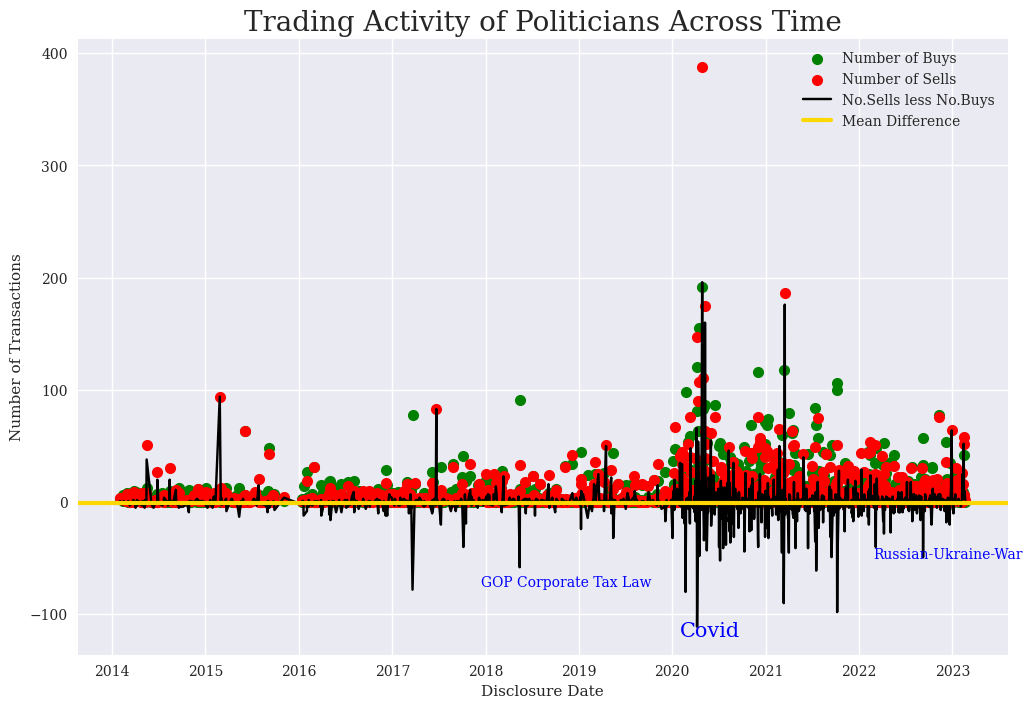

In [129]:
plt.figure(figsize=(12,8))
plt.scatter(buys_sells.index,buys_sells.Buy, c = 'green', label = 'Number of Buys', linewidth = 1)
plt.scatter(buys_sells.index,buys_sells.Sell, c = 'red', label = 'Number of Sells', linewidth = 1)
plt.plot(buys_sells.Sell- buys_sells.Buy,c='black',label= 'No.Sells less No.Buys')
plt.axhline((buys_sells.Sell-buys_sells.Buy).mean(), label = 'Mean Difference', linewidth = 3,color = 'gold')
plt.text(pd.to_datetime('2020-01-30'), -120,'Covid', c ='blue', fontsize = 15)
plt.text(pd.to_datetime('2022-02-24'),-50,'Russian-Ukraine-War', c = 'blue', fontsize = 10)
plt.text(pd.to_datetime('2017-12-15'),-75,'GOP Corporate Tax Law', c = 'blue', fontsize = 10)
plt.legend(loc =0)
plt.xlabel('Disclosure Date')
plt.ylabel('Number of Transactions')
plt.title('Trading Activity of Politicians Across Time', fontsize = 20)
plt.savefig('Trading_Activity.png')




- As you can see from the chart above there are spikes in the **Number of Buys** and **Number of Sells** on any given disclosure date. It begs the question of why? It is human nature that when it comes to money - generally speaking- we are always motiviated in our self interest. Yes, the **STOCK ACT** is *supposed* to prohibit members of Congress and employees of Congress from using priviate information derived from their official positions for their personal benefit. In the court of law, proving such insider trading is probably impossible and not a top priority for the Department of Justice. With that being said, I believe we can find a predictive signal from aggregate *buying* and *selling* activity of United States Politicians. 

- Since politicians are privy to sensitive economic, geopolitical, and other important information before others know, we can get a better understanding of their psychological mindset. *Buying* and *Selling* relate to fear and greed. If politicians know senstive macroeconomic information, they will without a doubt react emotionally through buying and selling out of greed or fear. 
- For example, even though many investors *knew* about Covid-19, **many investors did not know** just how bad it would affect the global economy. However, being that polticians are surrouded by top scientists and the most up-to-date information, they have a better perspective on the gravity of the situation. It would make sense they would trade on this knowledge by selling off assets and raising cash to protect their money. 

- In the following week, month, or even quarter markets will begin to *price-in* this negative sentiment.

In [130]:
buy_sell = buys_sells.groupby(pd.Grouper(freq = '3M')).sum()

In [131]:
pti_index = trades_grouped.groupby(pd.Grouper(freq = '1m')).sum()

In [132]:
pti_index

type,Buy,Sell,Difference,No_Trades
Date,,,,
2014-01-31,3.0,3.0,0.0,6.0
2014-02-28,20.0,16.0,4.0,36.0
2014-03-31,23.0,16.0,7.0,39.0
2014-04-30,29.0,24.0,5.0,53.0
2014-05-31,29.0,65.0,-36.0,94.0
...,...,...,...,...
2022-10-31,92.0,87.0,5.0,179.0
2022-11-30,132.0,142.0,-10.0,274.0
2022-12-31,148.0,187.0,-39.0,335.0


In [133]:
pti_index['PTI_Index'] = pti_index.Difference/pti_index['No_Trades']

In [134]:
pti_index = pti_index.fillna(0)

In [135]:
pti_index['PTI_Index'].idxmax()

Timestamp('2015-08-31 00:00:00', freq='M')

In [136]:
t = 'If the index level is 75%, this means 75% of all trades in the time period were buys.'

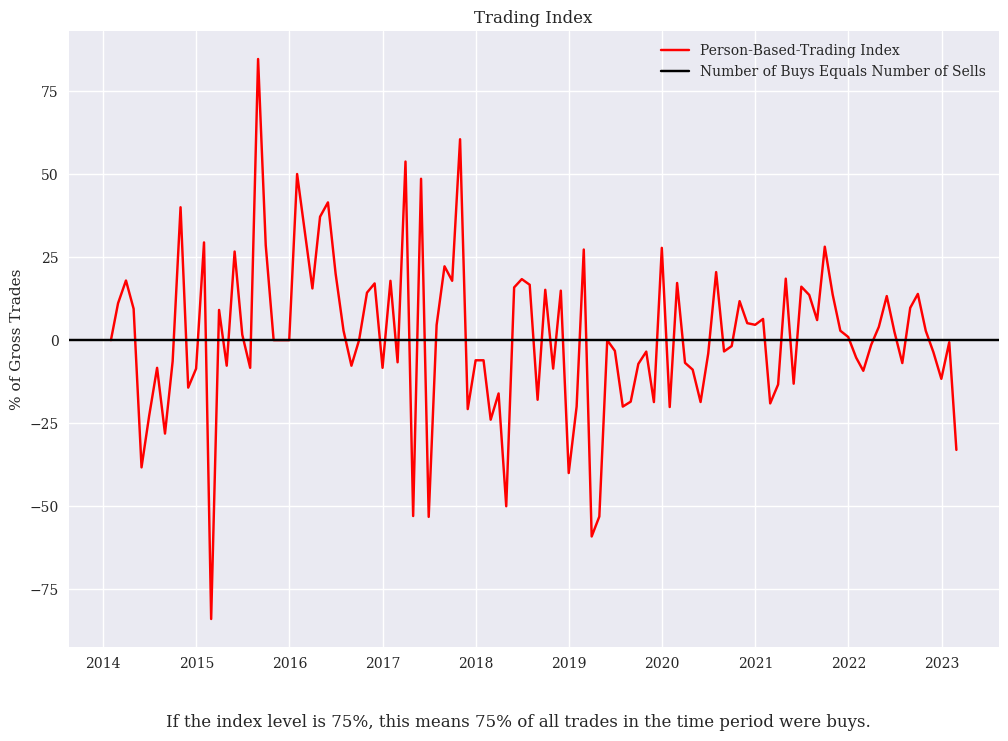

In [137]:
plt.figure(figsize=(12,8))
plt.plot(pti_index['PTI_Index']*100,label = 'Person-Based-Trading Index', c = 'red')
plt.title('Trading Index')
plt.axhline(0,label= 'Number of Buys Equals Number of Sells', c = 'black')
plt.ylabel('% of Gross Trades')
plt.figtext(x = .5,y = 0.01, s = t, fontsize = '12', wrap = True, horizontalalignment = 'center')
plt.legend(loc = 0)


In [138]:
pti_index = pti_index.replace(0,.001)

In [139]:
pti_index['PTI_Index'].std()

0.2506276368215754

In [140]:
# Calculating Z-score PTI_Index
pti_index['Z_PTI_Index'] = (pti_index['PTI_Index']-pti_index['PTI_Index'].mean())/(pti_index['PTI_Index'].std())

In [141]:
trades_grouped

type,Buy,Sell,Difference,No_Trades
Date,,,,
2014-01-31,3.0,3.0,0.0,6.0
2014-02-05,3.0,3.0,0.0,6.0
2014-02-11,6.0,3.0,3.0,9.0
2014-02-14,1.0,2.0,-1.0,3.0
2014-02-25,2.0,1.0,1.0,3.0
...,...,...,...,...
2023-02-13,9.0,15.0,-6.0,24.0
2023-02-14,6.0,47.0,-41.0,53.0
2023-02-15,2.0,6.0,-4.0,8.0


In [142]:
traded_days = market.loc['2014-01-01':'2023-02-21',:].index

In [143]:
buy_sell['PTI_Index'] = buy_sell['Difference']/buy_sell['No_Trades']

In [144]:
buy_sell['PTI_Index'].idxmin()

Timestamp('2015-04-30 00:00:00', freq='3M')

In [145]:
buys_sells.reset_index()

type,disclosure_date,Buy,Sell,Difference,No_Trades
0,2014-01-31,3.0,4.0,-1.0,7.0
1,2014-02-05,3.0,3.0,0.0,6.0
2,2014-02-11,6.0,4.0,2.0,10.0
3,2014-02-14,1.0,2.0,-1.0,3.0
4,2014-02-25,2.0,1.0,1.0,3.0
...,...,...,...,...,...
1245,2023-02-13,9.0,16.0,-7.0,25.0
1246,2023-02-14,6.0,58.0,-52.0,64.0
1247,2023-02-15,3.0,6.0,-3.0,9.0
1248,2023-02-17,42.0,52.0,-10.0,94.0


In [146]:
pti_index

type,Buy,Sell,Difference,No_Trades,PTI_Index,Z_PTI_Index
Date,,,,,,
2014-01-31,3.0,3.0,0.001,6.0,0.001000,-0.044875
2014-02-28,20.0,16.0,4.000,36.0,0.111111,0.394467
2014-03-31,23.0,16.0,7.000,39.0,0.179487,0.667286
2014-04-30,29.0,24.0,5.000,53.0,0.094340,0.327549
2014-05-31,29.0,65.0,-36.000,94.0,-0.382979,-1.576943
...,...,...,...,...,...,...
2022-10-31,92.0,87.0,5.000,179.0,0.027933,0.062587
2022-11-30,132.0,142.0,-10.000,274.0,-0.036496,-0.194485
2022-12-31,148.0,187.0,-39.000,335.0,-0.116418,-0.513370


In [147]:
market.resample('M').last()

,adj_close
date,
2004-01-31,78.531486
2004-02-29,79.597207
2004-03-31,78.546884
2004-04-30,77.060675
2004-05-31,78.380209
...,...
2022-10-31,384.423639
2022-11-30,405.794333
2022-12-31,382.430000


In [148]:
MARKET_RETURNS

,MKT_RETS
date,
2004-01-31,NaN
2004-02-29,0.024634
2004-03-31,0.019216
2004-04-30,-0.017005
2004-05-31,-0.014326
...,...
2022-10-31,-0.071370
2022-11-30,0.048853
2022-12-31,0.059451


# Building Predictive Regression

In [149]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats

In [150]:
PTI_lag1 = pti_index[['Z_PTI_Index']].shift(3)

MARKET_lag1 = MARKET_RETURNS.shift(1)
MARKET_lag1.columns = ['MKT_Rets_Lag1']
MARKET_lag3 = MARKET_RETURNS.shift(3)
MARKET_lag3.columns = ['MKT_Rets_Lag3']
MARKET_lag6 = MARKET_RETURNS.shift(6)
MARKET_lag6.columns = ['MKT_Rets_Lag6']
MARKET_lag9 = MARKET_RETURNS.shift(9)
MARKET_lag9.columns = ['MKT_Rets_Lag9']
MARKET_lag12 = MARKET_RETURNS.shift(12)
MARKET_lag12.columns = ['MKT_Rets_Lag12']
MARKET_Lag24 = MARKET_RETURNS.shift(24)
MARKET_Lag24.columns = ['MKT_Rets_Lag24']




In [151]:
corporate_bond_yields.head(3)

,BAA_Yield,AAA_Yield,dsspread
1986-01-02,0.1138,0.0992,0.0146
1986-01-03,0.1135,0.0992,0.0143
1986-01-06,0.1136,0.0994,0.0142


In [152]:
corporate_bonds = corporate_bond_yields.resample('M').last()

In [153]:
consumer_sentiment.loc['2014-01-31']

Index   -0.015758
Name: 2014-01-31 00:00:00, dtype: float64

In [154]:
EPRATIO.loc['2014-01-31']

EPRATIO   -0.811184
Name: 2014-01-31 00:00:00, dtype: float64

In [155]:
TB3_Rate_Lag1 = interest_rates[['3-Month']].shift(1)
TB3_Rate_Lag1.columns = ['Three_M_TBill']
tsspread_lag1 = interest_rates[['term_spread']].shift(1)
dsspread_lag1 = corporate_bonds[['dsspread']].shift(1)
epratio_lag1 = EPRATIO.shift(1)
consumer_sentiment_lag1 = consumer_sentiment.shift(1)
consumer_sentiment_lag1.columns = ['UMICH_Consumer_Sentiment']


In [156]:
DATA_MATRIX = PTI_lag1

In [157]:
DATA_MATRIX = DATA_MATRIX.merge(MARKET_RETURNS,left_index=True,right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag3, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag6, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag12, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_Lag24, left_index=True, right_index=True)
# Adding Macroeconomic and other Important Financial Variables

DATA_MATRIX = DATA_MATRIX.merge(TB3_Rate_Lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(tsspread_lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(dsspread_lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(epratio_lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(consumer_sentiment_lag1, left_index=True, right_index=True)




<AxesSubplot:>

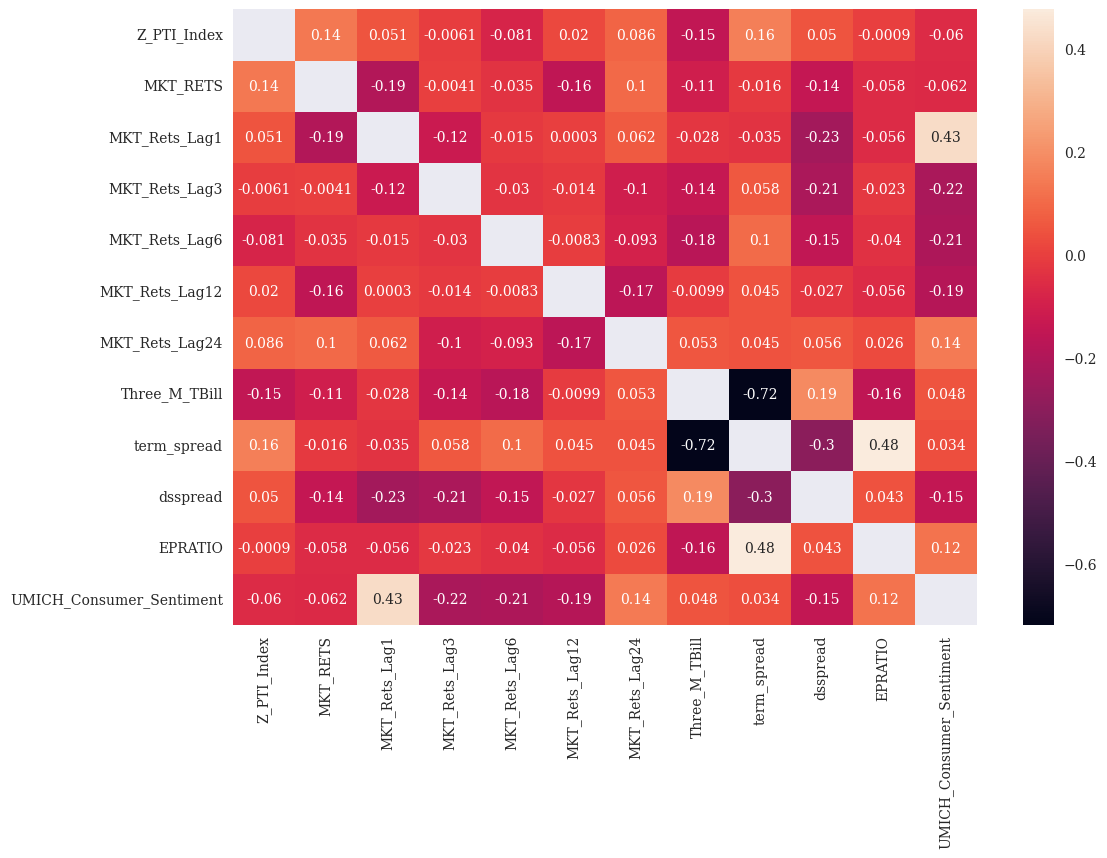

In [158]:
corr_mat = DATA_MATRIX.corr()
plt.figure(figsize  = (12,8))
corr_mat[corr_mat == 1] = None
sns.heatmap(corr_mat, annot = True)

|       |   PTI_Index |    MKT_RETS |   MKT_Rets_Lag1 |   MKT_Rets_Lag3 |   MKT_Rets_Lag6 |   MKT_Rets_Lag12 |   MKT_Rets_Lag24 |   3_MTB_Rate |   term_spread |     dsspread |    EPRATIO |   UMICH_Consumer_Sentiment |
|:------|------------:|------------:|----------------:|----------------:|----------------:|-----------------:|-----------------:|-------------:|--------------:|-------------:|-----------:|---------------------------:|
| count | 107         | 107         |     107         |     107         |     107         |     107          |      107         | 107          |   107         | 107          | 107        |               107          |
| mean  |   0.0167669 |   0.0101577 |       0.0097769 |       0.0105956 |       0.0113315 |       0.0131051  |        0.0125491 |   0.00825327 |     0.0126953 |   0.00922699 |  -1.58044  |                -0.00218209 |
| std   |   0.251608  |   0.0471054 |       0.0468672 |       0.0461555 |       0.0454044 |       0.0432229  |        0.0443014 |   0.00961234 |     0.007998  |   0.00239073 |   0.446783 |                 0.0504526  |
| min   |  -0.839286  |  -0.198738  |      -0.198738  |      -0.198738  |      -0.198738  |      -0.198738   |       -0.198738  |   0          |    -0.0051    |   0.0054     |  -2.44461  |                -0.194164   |
| 25%   |  -0.0857143 |  -0.0143631 |      -0.0143631 |      -0.0140764 |      -0.0128349 |      -0.00234044 |       -0.0052643 |   0.0005     |     0.00685   |   0.0071     |  -1.91194  |                -0.0237461  |
| 50%   |   0         |   0.0179656 |       0.0179656 |       0.0187079 |       0.0196079 |       0.0197749  |        0.0197749 |   0.0032     |     0.013     |   0.009      |  -1.56317  |                 0.00103199 |
| 75%   |   0.159825  |   0.0344625 |       0.0332733 |       0.0332733 |       0.0343045 |       0.0343045  |        0.0353163 |   0.01555    |     0.0189    |   0.0106     |  -1.22999  |                 0.0286577  |
| max   |   0.846154  |   0.148852  |       0.148852  |       0.148852  |       0.148852  |       0.148852   |        0.148852  |   0.0423     |     0.0293    |   0.019      |  -0.811184 |                 0.130097   |

In [159]:
DATA_MATRIX.columns

Index(['Z_PTI_Index', 'MKT_RETS', 'MKT_Rets_Lag1', 'MKT_Rets_Lag3',
       'MKT_Rets_Lag6', 'MKT_Rets_Lag12', 'MKT_Rets_Lag24', 'Three_M_TBill',
       'term_spread', 'dsspread', 'EPRATIO', 'UMICH_Consumer_Sentiment'],
      dtype='object')

In [160]:
multiple_ols = smf.ols(formula='MKT_RETS ~ Z_PTI_Index + MKT_Rets_Lag1 + MKT_Rets_Lag3 + MKT_Rets_Lag6 + MKT_Rets_Lag12 + MKT_Rets_Lag24 + Three_M_TBill +\
    term_spread + dsspread + EPRATIO + UMICH_Consumer_Sentiment', data = DATA_MATRIX)

In [161]:
results = multiple_ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MKT_RETS   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     2.311
Date:                Tue, 28 Feb 2023   Prob (F-statistic):             0.0148
Time:                        16:50:01   Log-Likelihood:                 186.39
No. Observations:                 106   AIC:                            -348.8
Df Residuals:                      94   BIC:                            -316.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1406      0.044      3.231      0.002       0.054       0.227
Z_PTI_Index                  0.0075      0.004      1.693      0.094      -0.001       0.016
MKT_Rets_Lag1               -0.3019      0.108     -2.800      0.006      -0.516      -0.088
MKT_Rets_Lag3               -0.1460      0.101     -1.444      0.152      -0.347       0.055
MKT_Rets_Lag6               -0.0871      0.102     -0.858      0.393      -0.289       0.115
MKT_Rets_Lag12              -0.1538      0.104     -1.477      0.143      -0.361       0.053
MKT_Rets_Lag24               0.1391      0.102      1.364      0.176      -0.063       0.342
Three_M_TBill               -1.7215      0.675     -2.550      0.012      -3.062      -0.381
term_spread                 -2.5254      0.985     -2.564      0.012      -4.481      -0.570
dsspread                    -7.0625      2.174     -3.248      0.002     -11.380      -2.745
EPRATIO                      0.0087      0.012      0.716      0.476      -0.015       0.033
UMICH_Consumer_Sentiment    -0.0587      0.104     -0.563      0.575      -0.266       0.148
==============================================================================
Omnibus:                       11.326   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.470
Skew:                          -0.501   Prob(JB):                     0.000265
Kurtosis:                       4.650   Cond. No.                         992.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
table = pd.DataFrame({'Beta_Coefficients': results.params,'SE':results.bse,'t_stat':results.tvalues,'pval':results.pvalues})
table = np.round(table, 5)

In [163]:
predictions = pd.DataFrame(results.fittedvalues, columns=['Forecasted_Market_Return'])
observed_values  = DATA_MATRIX[['MKT_RETS']]
dependendent_variables = predictions.join(observed_values, how = 'inner')
errors = pd.DataFrame(results.resid,columns=['Residuals'])

In [164]:
dependendent_variables.corr()

,Forecasted_Market_Return,MKT_RETS
Forecasted_Market_Return,1.000000,0.461382
MKT_RETS,0.461382,1.000000


In [165]:
txt = 'Correlation Coefficient Between Predicted returns and Observed Returns is equal to 44.9% on a monthly basis'

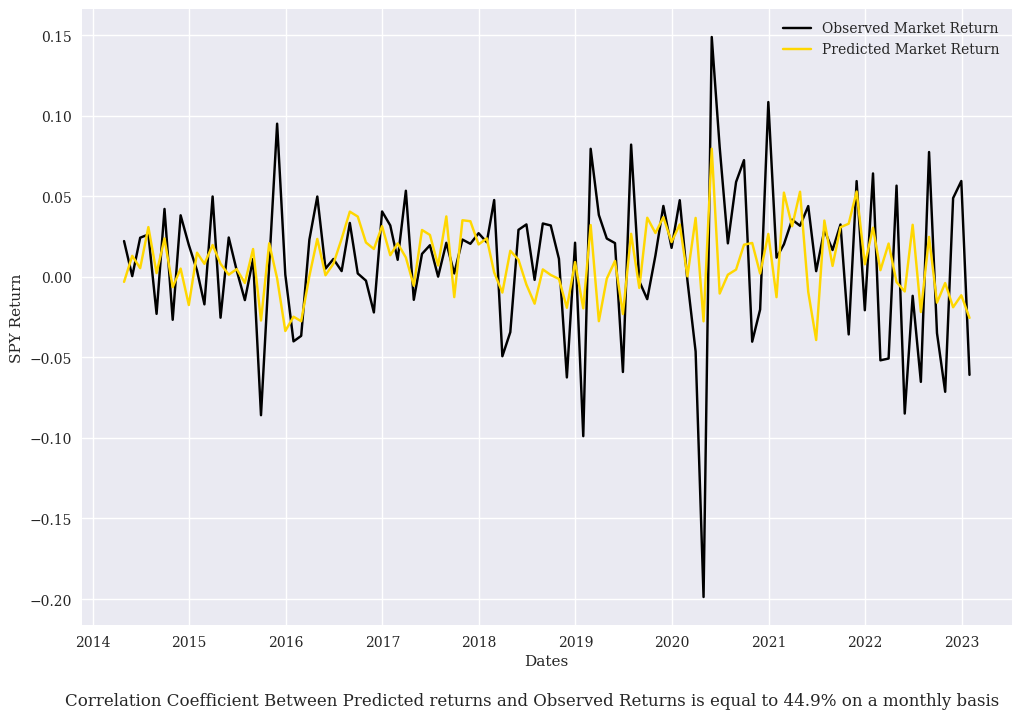

In [166]:
plt.figure(figsize=(12,8))

plt.plot(dependendent_variables.MKT_RETS, color = 'black',label = 'Observed Market Return')
plt.plot(dependendent_variables['Forecasted_Market_Return'], color = 'gold',label ='Predicted Market Return')
plt.figtext(x = .5,y = 0.01, s = txt, fontsize = '12', wrap = True, horizontalalignment = 'center')
plt.ylabel('SPY Return')
plt.xlabel('Dates')
plt.legend(loc = 0)

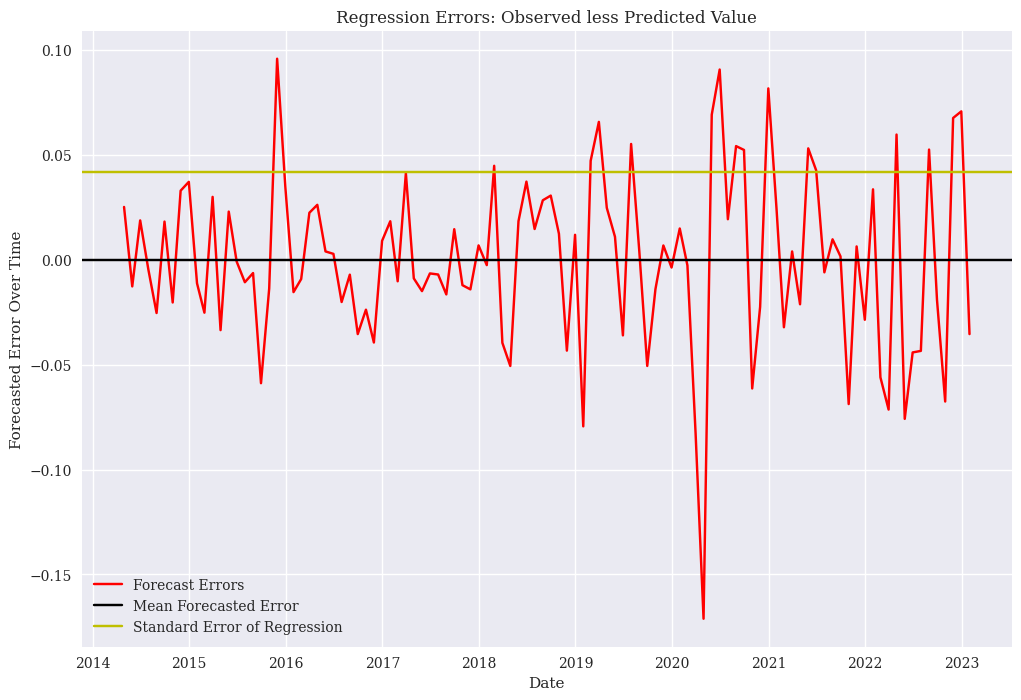

In [167]:
plt.figure(figsize=(12,8))
plt.plot(errors, label = 'Forecast Errors', c = 'red')
plt.axhline(0,label = 'Mean Forecasted Error', c= 'black')
plt.axhline(errors.std().values, label = 'Standard Error of Regression', c = 'y')
plt.title('Regression Errors: Observed less Predicted Value')
plt.xlabel('Date')
plt.ylabel('Forecasted Error Over Time')

plt.legend(loc = 0)

# Interpretation of Multiple Linear Regression Equation

|                          |   Beta_Coefficients |      SE |   t_stat |    pval |
|:-------------------------|--------------------:|--------:|---------:|--------:|
| Intercept                |             0.13837 | 0.04365 |  3.17004 | 0.00206 |
| Z_PTI_Index              |             0.00769 | 0.00446 |  1.72353 | 0.08812 |
| MKT_Rets_Lag1            |            -0.29384 | 0.10833 | -2.71235 | 0.00796 |
| MKT_Rets_Lag3            |            -0.15536 | 0.1018  | -1.52605 | 0.13039 |
| MKT_Rets_Lag6            |            -0.09559 | 0.10216 | -0.93573 | 0.35184 |
| MKT_Rets_Lag12           |            -0.14332 | 0.10492 | -1.3659  | 0.17526 |
| MKT_Rets_Lag24           |             0.13525 | 0.10218 |  1.32368 | 0.18885 |
| Three_M_TBill            |            -1.59604 | 0.691   | -2.30975 | 0.02311 |
| term_spread              |            -2.51809 | 0.98628 | -2.55312 | 0.0123  |
| dsspread                 |            -6.97395 | 2.17922 | -3.20021 | 0.00188 |
| EPRATIO                  |             0.00826 | 0.01212 |  0.68095 | 0.4976  |
| UMICH_Consumer_Sentiment |            -0.05526 | 0.10448 | -0.52889 | 0.59814 |

- With a *p-value* of 0.08812 we have fairly strong evidence against the null hypothesis that a **Z_score Coefficient on the lagged 3-month PTI Index** is statistically significant. I am happy to have found economic signficance in this regression while controlling for many different variables. Holding other factors fixed, we can say that a one standard deviation increase in the lagged 3-month **Politican Trading Index** will predict $.00769\cdot 0.25 = 0.0019225$ or about 20 basis point increase in the 1-month market returns. 

- This provides solid evidence that elevated levels of politicians trading stocks does indicate causal effects on future market returns. 

# Econometric Analysis 

- Here I am going to implement a probit model, to get a better sense of trying to predict the general direction of future market returns. Since predicting future returns is impractical in the long-run, I do believe, predicting general future market movements is possible using a probistic regression.

- Below I will define a binary response variable where $y=1$ if market return is positive and $y = 0$ if the market return in the monthly period is negative. 

In [168]:
def _filter_mkt_rets(df:pd.DataFrame):
    if df >= 0:
        mkt_ret = 1
    else:
        mkt_ret = 0
    
    return mkt_ret




In [184]:
pd.DataFrame(MARKET_RETURNS.MKT_RETS.apply(_filter_mkt_rets)).rename(columns={'MKT_RETS':'Direction'})

,Direction
date,
2004-01-31,0
2004-02-29,1
2004-03-31,1
2004-04-30,0
2004-05-31,0
...,...
2022-10-31,0
2022-11-30,1
2022-12-31,1


In [185]:
direction_df = pd.DataFrame(MARKET_RETURNS.MKT_RETS.apply(_filter_mkt_rets)).rename(columns={'MKT_RETS':'Direction'})


In [186]:
probit_matrix = PTI_lag1

In [187]:
probit_matrix = probit_matrix.merge(direction_df,left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag3, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag6, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag12, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_Lag24, left_index=True, right_index=True)
# Adding Macroeconomic and other Important Financial Variables

probit_matrix = probit_matrix.merge(TB3_Rate_Lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(tsspread_lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(dsspread_lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(epratio_lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(consumer_sentiment_lag1, left_index=True, right_index=True)

In [ ]:
probit_matrix.corr()


,Z_PTI_Index,Direction,MKT_Rets_Lag1,MKT_Rets_Lag3,MKT_Rets_Lag6,MKT_Rets_Lag12,MKT_Rets_Lag24,Three_M_TBill,term_spread,dsspread,EPRATIO,UMICH_Consumer_Sentiment
Z_PTI_Index,1.000000,0.153237,0.050793,-0.006057,-0.081371,0.019605,0.085636,-0.153482,0.157805,0.049652,-0.000896,-0.059975
Direction,0.153237,1.000000,-0.071074,-0.025620,-0.003666,-0.212584,0.034197,-0.113394,0.054920,-0.134051,0.032243,0.006886
MKT_Rets_Lag1,0.050793,-0.071074,1.000000,-0.123683,-0.014557,0.000298,0.062100,-0.027543,-0.034631,-0.234518,-0.055715,0.428228
MKT_Rets_Lag3,-0.006057,-0.025620,-0.123683,1.000000,-0.030319,-0.013657,-0.102908,-0.138931,0.057514,-0.212623,-0.022879,-0.216350
MKT_Rets_Lag6,-0.081371,-0.003666,-0.014557,-0.030319,1.000000,-0.008303,-0.092650,-0.176750,0.104138,-0.149271,-0.040399,-0.205806
MKT_Rets_Lag12,0.019605,-0.212584,0.000298,-0.013657,-0.008303,1.000000,-0.165982,-0.009943,0.045438,-0.026634,-0.055973,-0.186375
MKT_Rets_Lag24,0.085636,0.034197,0.062100,-0.102908,-0.092650,-0.165982,1.000000,0.053297,0.044601,0.056410,0.025605,0.144760
Three_M_TBill,-0.153482,-0.113394,-0.027543,-0.138931,-0.176750,-0.009943,0.053297,1.000000,-0.719825,0.185210,-0.157314,0.047982
term_spread,0.157805,0.054920,-0.034631,0.057514,0.104138,0.045438,0.044601,-0.719825,1.000000,-0.299730,0.477582,0.034461
dsspread,0.049652,-0.134051,-0.234518,-0.212623,-0.149271,-0.026634,0.056410,0.185210,-0.299730,1.000000,0.043063,-0.148844


In [ ]:
probit_matrix.describe()

,Z_PTI_Index,Direction,MKT_Rets_Lag1,MKT_Rets_Lag3,MKT_Rets_Lag6,MKT_Rets_Lag12,MKT_Rets_Lag24,Three_M_TBill,term_spread,dsspread,EPRATIO,UMICH_Consumer_Sentiment
count,106.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.020266,0.678899,0.010368,0.010069,0.010406,0.013820,0.012673,0.008504,0.012642,0.009238,-1.576735,-0.000770
std,1.008450,0.469056,0.046694,0.046459,0.045632,0.043173,0.043910,0.010127,0.008295,0.002383,0.449437,0.051152
min,-3.397601,0.000000,-0.198738,-0.198738,-0.198738,-0.198738,-0.198738,0.000000,-0.008000,0.005400,-2.444607,-0.194164
25%,-0.390863,0.000000,-0.014281,-0.014281,-0.013872,-0.002309,-0.002773,0.000500,0.006000,0.007100,-1.914963,-0.022335
50%,-0.028049,1.000000,0.018708,0.018708,0.018708,0.020174,0.019775,0.003200,0.013000,0.009000,-1.563175,0.002037
75%,0.591017,1.000000,0.033441,0.033441,0.033441,0.035465,0.035168,0.015700,0.019200,0.010600,-1.223334,0.030000
max,3.327275,1.000000,0.148852,0.148852,0.148852,0.148852,0.148852,0.043300,0.029300,0.019000,-0.811184,0.130097


In [188]:
reg_probit = smf.probit(formula='Direction ~ Z_PTI_Index + MKT_Rets_Lag1 + MKT_Rets_Lag3 + MKT_Rets_Lag6 + MKT_Rets_Lag12 + MKT_Rets_Lag24 + Three_M_TBill +\
    term_spread + dsspread + EPRATIO + UMICH_Consumer_Sentiment', data = probit_matrix)
results_probit = reg_probit.fit(disp = 0)

In [189]:
coef_names = results_probit.model.exog_names
coef_names = np.delete(coef_names,0)

In [190]:
# Calculating Average Partial Effect
ape_probit = results_probit.get_margeff().margeff

In [191]:
table_probit = pd.DataFrame({'coef_names': coef_names, 'APE_Probit':ape_probit})

In [192]:
y = stats.binom.rvs(1,.5, size = 106)
x = stats.norm.rvs(0,1, size = 106) + 2*y
sim_data = pd.DataFrame({'y':y, 'x':x})

In [193]:
sim_data

,y,x
0,1,2.306465
1,1,1.541698
2,1,2.894845
3,1,0.996797
4,1,2.070550
...,...,...
101,0,0.264231
102,1,1.213305
103,0,-0.529443
104,1,3.056774


In [194]:
results_probit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  106
Model:                         Probit   Df Residuals:                       94
Method:                           MLE   Df Model:                           11
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.1202
Time:                        16:54:30   Log-Likelihood:                -58.516
converged:                       True   LL-Null:                       -66.508
Covariance Type:            nonrobust   LLR p-value:                    0.1417
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.4045      1.328      2.563      0.010       0.801       6.008
Z_PTI_Index                  0.2508      0.142      1.762      0.078      -0.028       0.530
MKT_Rets_Lag1               -4.3735      3.367     -1.299      0.194     -10.973       2.226
MKT_Rets_Lag3               -3.5619      3.043     -1.170      0.242      -9.527       2.403
MKT_Rets_Lag6               -0.9819      2.997     -0.328      0.743      -6.855       4.892
MKT_Rets_Lag12              -8.2500      3.702     -2.229      0.026     -15.506      -0.994
MKT_Rets_Lag24               0.9324      3.135      0.297      0.766      -5.212       7.077
Three_M_TBill              -31.2454     20.574     -1.519      0.129     -71.570       9.079
term_spread                -39.2048     30.009     -1.306      0.191     -98.022      19.612
dsspread                  -157.7558     67.727     -2.329      0.020    -290.498     -25.014
EPRATIO                      0.2904      0.374      0.776      0.438      -0.443       1.024
UMICH_Consumer_Sentiment    -1.2621      3.175     -0.397      0.691      -7.485       4.961
============================================================================================
"""

In [ ]:
table_probit

,coef_names,APE_Probit
0,Z_PTI_Index,0.078393
1,MKT_Rets_Lag1,-1.366900
2,MKT_Rets_Lag3,-1.113227
3,MKT_Rets_Lag6,-0.306888
4,MKT_Rets_Lag12,-2.578443
5,MKT_Rets_Lag24,0.291402
6,Three_M_TBill,-9.765423
7,term_spread,-12.253027
8,dsspread,-49.304887
9,EPRATIO,0.090771


In [ ]:
stats.norm.cdf(0+.22)

0.5870644226482146

In [ ]:
stats.norm.cdf(-.6)

0.2742531177500736

In [ ]:
results_probit.fittedvalues.mean()

0.5382740456240753

In [ ]:
direction_df.pivot_table(values = 'Direction', columns='Direction',aggfunc='mean')

Direction


In [ ]:
direction_df.value_counts()

Direction
1            149
0             81
dtype: int64

<AxesSubplot:>

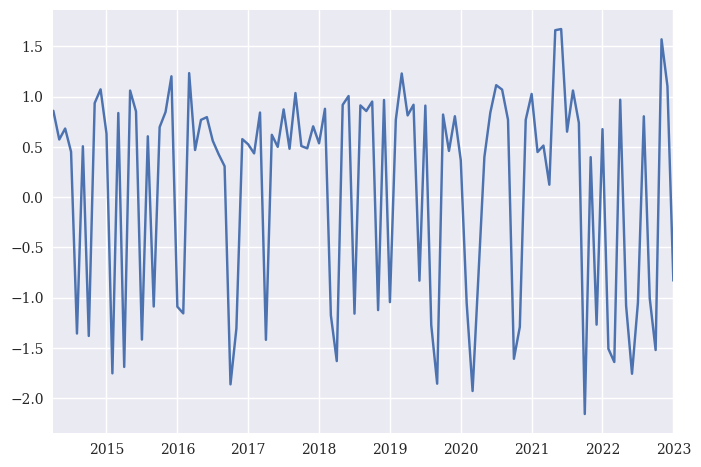

In [ ]:
results_probit.resid_dev

In [ ]:
results_probit.fittedvalues

2014-04-30    0.500647
2014-05-31    1.030339
2014-06-30    0.814709
2014-07-31    1.300847
2014-08-31    0.258216
                ...   
2022-09-30   -0.261224
2022-10-31    0.483396
2022-11-30   -0.548692
2022-12-31    0.110400
2023-01-31   -0.545549
Length: 106, dtype: float64

(array([ 6., 10., 16., 24., 20., 15., 12.,  2.,  0.,  1.]),
 array([-0.68376478, -0.37255305, -0.06134132,  0.24987041,  0.56108215,
         0.87229388,  1.18350561,  1.49471734,  1.80592907,  2.11714081,
         2.42835254]),
 <BarContainer object of 10 artists>)

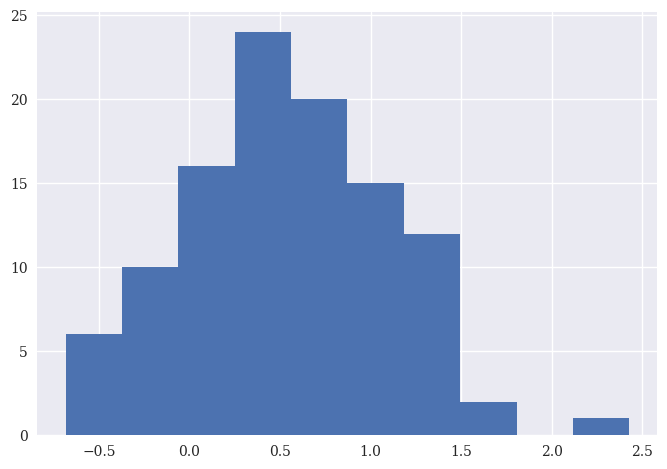

In [195]:
plt.hist(results_probit.fittedvalues)

In [196]:
xb_probit = results_probit.fittedvalues
factor_probit = stats.norm.pdf(xb_probit)

In [197]:
pe_probit = results_probit.params['dsspread']*factor_probit

In [198]:
cdf_norm = results_probit.fittedvalues.sort_values()

Text(0.5, 1.0, 'Empirical Probistic CDF ')

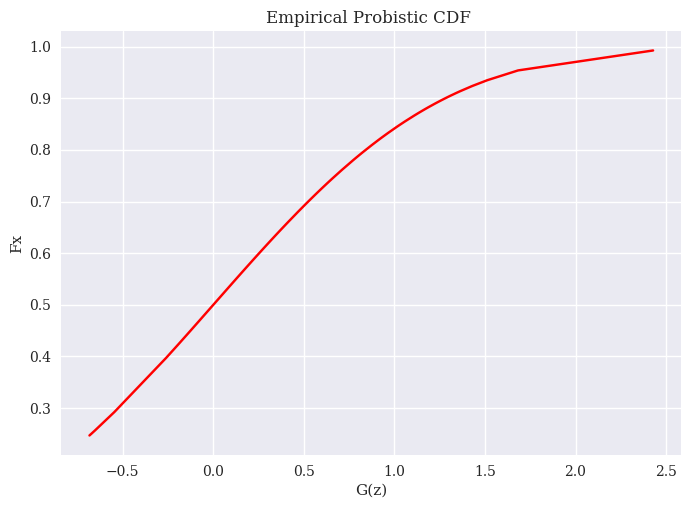

In [199]:
plt.plot(cdf_norm, stats.norm.cdf(cdf_norm), c = 'r')
plt.ylabel('Fx')
plt.xlabel('G(z)')
plt.title('Empirical Probistic CDF ')

In [201]:
MARKET_RETURNS

,MKT_RETS
date,
2004-01-31,NaN
2004-02-29,0.024634
2004-03-31,0.019216
2004-04-30,-0.017005
2004-05-31,-0.014326
...,...
2022-10-31,-0.071370
2022-11-30,0.048853
2022-12-31,0.059451


In [319]:
m_ret = market.resample('M').last()

In [320]:
m_ret

,adj_close
date,
2004-01-31,78.531486
2004-02-29,79.597207
2004-03-31,78.546884
2004-04-30,77.060675
2004-05-31,78.380209
...,...
2022-10-31,384.423639
2022-11-30,405.794333
2022-12-31,382.430000


In [377]:
ADF_AUT = sm.tsa.stattools.adfuller(m_ret, maxlag = 24,regression = 'ct',regresults=True, autolag=None)


In [394]:
ADF_AUT_rets = sm.tsa.stattools.adfuller(MARKET_RETURNS.dropna(), regression = 'c', maxlag= 24, autolag = None, regresults=True)

In [395]:
pd.DataFrame([ADF_AUT_rets[3].resols.params,ADF_AUT_rets[3].resols.tvalues],columns=ADF_AUT_rets[3].resols.model.exog_names, index = ['Coef','T-stat']).T

,Coef,T-stat
x1,-1.414035,-3.322501
x2,0.346342,0.836032
x3,0.287988,0.717686
x4,0.371203,0.959285
x5,0.470650,1.250314
x6,0.438639,1.197795
x7,0.337524,0.946798
x8,0.393658,1.138126
x9,0.364801,1.085890
x10,0.355008,1.085329


In [379]:
ADF_AUT[3].resols.model.exog_names

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'const',
 'x26']

In [386]:
pd.DataFrame([ADF_AUT[3].resols.params,ADF_AUT[3].resols.tvalues],columns=ADF_AUT[3].resols.model.exog_names, index = ['Coef','T-stat']).T

,Coef,T-stat
x1,0.009514,0.429086
x2,-0.255087,-3.215348
x3,-0.016845,-0.204594
x4,0.015801,0.196926
x5,0.066348,0.832897
x6,0.036372,0.456411
x7,-0.145894,-1.810490
x8,0.219322,2.693297
x9,0.016652,0.199200
x10,-0.257293,-2.897566


In [301]:
ADF_AUT[3].resols.pvalues

array([1.91267194e-27, 5.14038609e-02, 2.39886964e-03])

array([[<AxesSubplot:title={'center':'Direction'}>]], dtype=object)

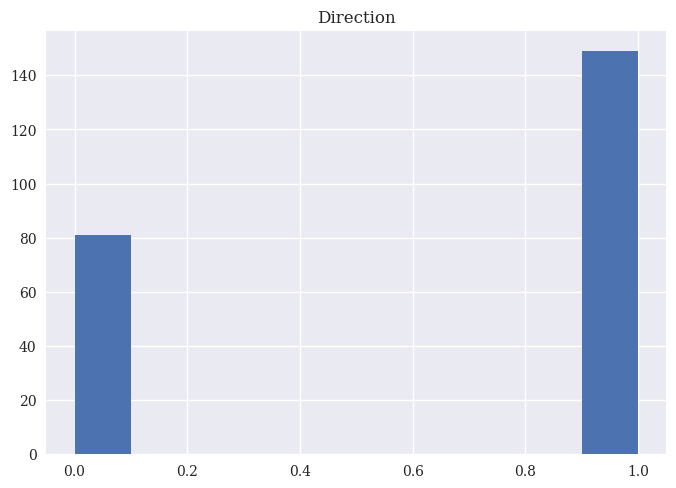

In [410]:
direction_df.hist()

Since 2004, there have been 80 months of negative returns and over 140 months of positive returns in the market. 

In [412]:
len(direction_df)

230

In [400]:
direction_df

,Direction
date,
2004-01-31,0
2004-02-29,1
2004-03-31,1
2004-04-30,0
2004-05-31,0
...,...
2022-10-31,0
2022-11-30,1
2022-12-31,1
